In [153]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

In [154]:
def cv_show(im,msg):
    cv2.imshow(msg,im)
    cv2.waitKey(0)
    cv2.destroyAllWindows()	

In [155]:
def plt_show(im):
    plt.axis("off")
    plt.imshow(im, cmap="gray")
    plt.show()
    

In [156]:
def hist_img_v0(f):
    m, n = f.shape
    h = [0.0] * 256
    for i in range(m):
        for j in range(n):
            h[f[i, j]]+=1
    return np.array(h, dtype='uint16')

In [157]:
def intermean(hist, t):
    tot = np.sum(hist)
    prob = hist/tot
    w0 = np.sum(prob[:t+1]) + 0.0000001
    #w1 = np.sum(prob[t+1:])
    w1 = (1 - w0) + 0.0000001
    i0 = np.array([i for i in range(0,t+1)])
    i1 = np.array([i for i in range(t+1, 256)])
    u0 = np.sum(i0*prob[:t+1])/w0
    u1 = np.sum(i1*prob[t+1:])/w1
    if u0 == 0.0:
        thr = u1
    elif u1 == 0.0:
        thr = u0
    else:
        thr = (u0+u1)/2
    return thr.astype(np.uint8)

In [158]:
img = cv2.imread("./images/test1.jpg", 0)

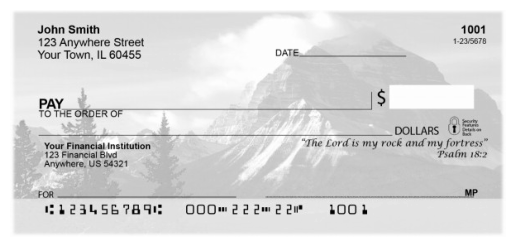

In [159]:
plt_show(img)

In [160]:
hist = hist_img_v0(img)

In [161]:
t0 = 10
tol = 1
flag = True
T = []
T.append(t0)
while(flag):
    t1 = intermean(hist, t0)
    T.append(t1)
    if abs(t1-t0) <= tol :
        flag = False
    else:
        t0 = t1
thr = T[-1]
print(T, thr)

[10, 108, 134, 146, 150, 151] 151


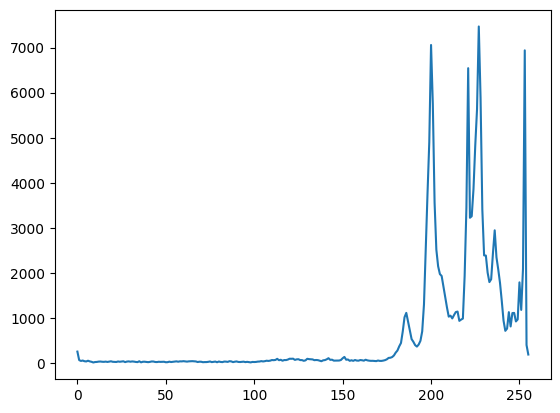

In [162]:
plt.plot(hist)
plt.savefig('graph.jpg')

In [163]:
out = np.zeros_like(img)
out[img <= thr ] = 0
out[img > thr] = 255

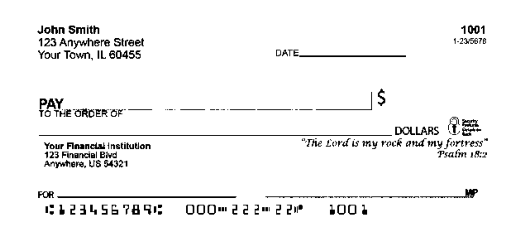

In [164]:
plt_show(out)

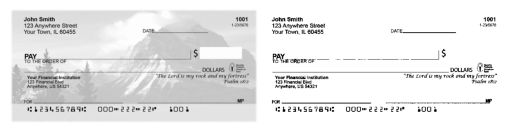

In [165]:
imgs = cv2.hconcat([img, out])
plt_show(imgs)